In [1]:
import opendatasets as od
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns 
from sklearn.metrics import mean_squared_error

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [8]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview"

In [10]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [04:34<00:00, 6.10MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction


In [212]:
data_dir = "D:/Internship/Taxi Fare nyc/new-york-city-taxi-fare-prediction"

In [3]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.50000,2009-06-15 17:26:21 UTC,-73.84431,40.72132,-73.84161,40.71228,1
1,2010-01-05 16:52:16.0000002,16.90000,2010-01-05 16:52:16 UTC,-74.01605,40.71130,-73.97927,40.78200,1
2,2011-08-18 00:35:00.00000049,5.70000,2011-08-18 00:35:00 UTC,-73.98274,40.76127,-73.99124,40.75056,2
3,2012-04-21 04:30:42.0000001,7.70000,2012-04-21 04:30:42 UTC,-73.98713,40.73314,-73.99157,40.75809,1
4,2010-03-09 07:51:00.000000135,5.30000,2010-03-09 07:51:00 UTC,-73.96810,40.76801,-73.95665,40.78376,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.00000,2014-03-15 03:28:00 UTC,-74.00527,40.74003,-73.96328,40.76255,1
55423852,2009-03-24 20:46:20.0000002,4.20000,2009-03-24 20:46:20 UTC,-73.95778,40.76553,-73.95164,40.77396,1
55423853,2011-04-02 22:04:24.0000004,14.10000,2011-04-02 22:04:24 UTC,-73.97051,40.75232,-73.96054,40.79734,1
55423854,2011-10-26 05:57:51.0000002,28.90000,2011-10-26 05:57:51 UTC,-73.98090,40.76463,-73.87060,40.77396,1


In [4]:
col_name = list(df.columns)
col_name

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [4]:
n = len(df)
s = round(n * 0.1)

skip = sorted(random.sample(range(1, n+1), n-s))

In [5]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv", skiprows=skip)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-07-22 16:08:00.000000163,5.30000,2009-07-22 16:08:00 UTC,-73.98106,40.73769,-73.99418,40.72841,1
1,2009-12-10 15:37:00.00000020,6.10000,2009-12-10 15:37:00 UTC,-73.96962,40.75697,-73.98115,40.75971,1
2,2013-08-11 00:52:00.00000026,4.50000,2013-08-11 00:52:00 UTC,-73.98102,40.73776,-73.98067,40.73050,2
3,2015-01-11 03:15:38.0000001,58.00000,2015-01-11 03:15:38 UTC,-73.98333,40.73872,-73.93320,40.84723,1
4,2009-03-23 12:13:29.0000002,6.50000,2009-03-23 12:13:29 UTC,-73.98543,40.73601,-73.98250,40.72480,1
...,...,...,...,...,...,...,...,...
5542381,2013-09-04 20:20:00.000000148,13.00000,2013-09-04 20:20:00 UTC,-73.99560,40.72571,-73.95465,40.71670,1
5542382,2014-04-29 00:47:35.0000003,4.50000,2014-04-29 00:47:35 UTC,-73.99173,40.76011,-73.99983,40.76137,1
5542383,2014-03-04 22:25:01.0000002,12.00000,2014-03-04 22:25:01 UTC,-73.98301,40.74508,-73.95418,40.76734,1
5542384,2014-03-15 03:28:00.00000070,14.00000,2014-03-15 03:28:00 UTC,-74.00527,40.74003,-73.96328,40.76255,1


In [6]:
df = df.drop(["key"], axis=1)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5.30000,2009-07-22 16:08:00 UTC,-73.98106,40.73769,-73.99418,40.72841,1
1,6.10000,2009-12-10 15:37:00 UTC,-73.96962,40.75697,-73.98115,40.75971,1
2,4.50000,2013-08-11 00:52:00 UTC,-73.98102,40.73776,-73.98067,40.73050,2
3,58.00000,2015-01-11 03:15:38 UTC,-73.98333,40.73872,-73.93320,40.84723,1
4,6.50000,2009-03-23 12:13:29 UTC,-73.98543,40.73601,-73.98250,40.72480,1
...,...,...,...,...,...,...,...
5542381,13.00000,2013-09-04 20:20:00 UTC,-73.99560,40.72571,-73.95465,40.71670,1
5542382,4.50000,2014-04-29 00:47:35 UTC,-73.99173,40.76011,-73.99983,40.76137,1
5542383,12.00000,2014-03-04 22:25:01 UTC,-73.98301,40.74508,-73.95418,40.76734,1
5542384,14.00000,2014-03-15 03:28:00 UTC,-74.00527,40.74003,-73.96328,40.76255,1


In [41]:
lat_values = []
for i in range(-90,91):
    lat_values.append(i)

lon_values = []
for j in range(-180, 181):
    lon_values.append(j)

the range of latitude is -90 to +90 
the range of longitude is -180 to +180
Hence, any value greater than mentioned value must be dropped 

In [7]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [8]:
df = remove_outliers(df)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5.30000,2009-07-22 16:08:00 UTC,-73.98106,40.73769,-73.99418,40.72841,1
1,6.10000,2009-12-10 15:37:00 UTC,-73.96962,40.75697,-73.98115,40.75971,1
2,4.50000,2013-08-11 00:52:00 UTC,-73.98102,40.73776,-73.98067,40.73050,2
3,58.00000,2015-01-11 03:15:38 UTC,-73.98333,40.73872,-73.93320,40.84723,1
4,6.50000,2009-03-23 12:13:29 UTC,-73.98543,40.73601,-73.98250,40.72480,1
...,...,...,...,...,...,...,...
5542381,13.00000,2013-09-04 20:20:00 UTC,-73.99560,40.72571,-73.95465,40.71670,1
5542382,4.50000,2014-04-29 00:47:35 UTC,-73.99173,40.76011,-73.99983,40.76137,1
5542383,12.00000,2014-03-04 22:25:01 UTC,-73.98301,40.74508,-73.95418,40.76734,1
5542384,14.00000,2014-03-15 03:28:00 UTC,-74.00527,40.74003,-73.96328,40.76255,1


In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5406604.00000,5406604.00000,5406604.00000,5406604.00000,5406604.00000,5406604.00000
mean,11.33684,-73.97515,40.75105,-73.97431,40.75141,1.69173
std,9.69620,0.03912,0.03005,0.03833,0.03323,1.30812
min,1.00000,-74.98856,40.00000,-74.98084,40.00241,1.00000
25%,6.00000,-73.99229,40.73657,-73.99159,40.73555,1.00000
50%,8.50000,-73.98209,40.75339,-73.98061,40.75386,1.00000
75%,12.50000,-73.96831,40.76755,-73.96537,40.76840,2.00000
max,500.00000,-72.00593,41.96984,-72.08745,41.96973,6.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5406604 entries, 0 to 5542385
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_datetime    object 
 2   pickup_longitude   float64
 3   pickup_latitude    float64
 4   dropoff_longitude  float64
 5   dropoff_latitude   float64
 6   passenger_count    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.0+ MB


<AxesSubplot:ylabel='fare_amount'>

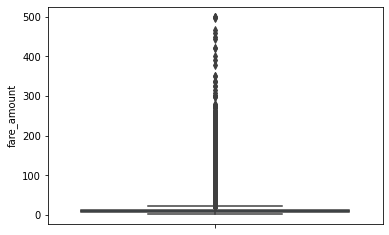

In [12]:
sns.boxplot(data = df, y = "fare_amount")

In [13]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df

C:\Users\saqui\AppData\Local\Temp/ipykernel_17164/2130850407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5.30000,2009-07-22 16:08:00+00:00,-73.98106,40.73769,-73.99418,40.72841,1
1,6.10000,2009-12-10 15:37:00+00:00,-73.96962,40.75697,-73.98115,40.75971,1
2,4.50000,2013-08-11 00:52:00+00:00,-73.98102,40.73776,-73.98067,40.73050,2
3,58.00000,2015-01-11 03:15:38+00:00,-73.98333,40.73872,-73.93320,40.84723,1
4,6.50000,2009-03-23 12:13:29+00:00,-73.98543,40.73601,-73.98250,40.72480,1
...,...,...,...,...,...,...,...
5542381,13.00000,2013-09-04 20:20:00+00:00,-73.99560,40.72571,-73.95465,40.71670,1
5542382,4.50000,2014-04-29 00:47:35+00:00,-73.99173,40.76011,-73.99983,40.76137,1
5542383,12.00000,2014-03-04 22:25:01+00:00,-73.98301,40.74508,-73.95418,40.76734,1
5542384,14.00000,2014-03-15 03:28:00+00:00,-74.00527,40.74003,-73.96328,40.76255,1


In [20]:
df_index = df.set_index("pickup_datetime")
df_index

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
pickup_datetime,,,,,,,
2009-07-22 16:08:00+00:00,5.30000,-73.98106,40.73769,-73.99418,40.72841,1,1.51190
2009-12-10 15:37:00+00:00,6.10000,-73.96962,40.75697,-73.98115,40.75971,1,1.01777
2013-08-11 00:52:00+00:00,4.50000,-73.98102,40.73776,-73.98067,40.73050,2,0.80815
2015-01-11 03:15:38+00:00,58.00000,-73.98333,40.73872,-73.93320,40.84723,1,12.78206
2009-03-23 12:13:29+00:00,6.50000,-73.98543,40.73601,-73.98250,40.72480,1,1.27058
...,...,...,...,...,...,...,...
2013-09-04 20:20:00+00:00,13.00000,-73.99560,40.72571,-73.95465,40.71670,1,3.59372
2014-04-29 00:47:35+00:00,4.50000,-73.99173,40.76011,-73.99983,40.76137,1,0.69643
2014-03-04 22:25:01+00:00,12.00000,-73.98301,40.74508,-73.95418,40.76734,1,3.46762


<AxesSubplot:xlabel='pickup_datetime'>

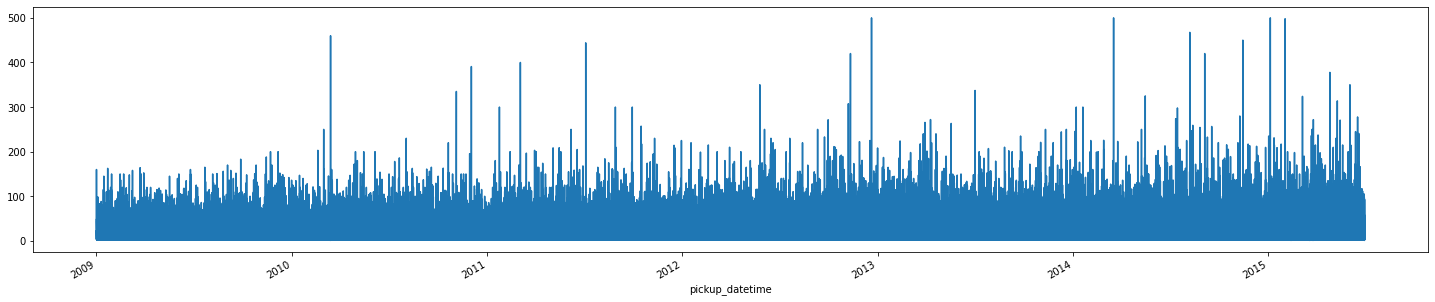

In [21]:
df_index["fare_amount"].plot(figsize = (25, 5))

Using Haversine formula 

* a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
* c = 2 ⋅ atan2( √a, √(1−a) )
* d = R ⋅ c

math module expects a single number, using numpy for providing series as input 

In [15]:
# Haversine Formula 
from math import radians, cos, sin, asin, sqrt

def haversine_dist(lon1, lat1, lon2, lat2):

    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1 
    a = np.sin(dlat / 2.0)** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371 # radius of earth in km

    distance = c * r

    return distance

In [16]:
def add_distance(df):
    df["trip_distance"] = haversine_dist(df["pickup_longitude"], df["pickup_latitude"], 
    df["dropoff_longitude"], df["dropoff_latitude"])

In [17]:
add_distance(df)
df

C:\Users\saqui\AppData\Local\Temp/ipykernel_17164/2373803200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trip_distance"] = haversine_dist(df["pickup_longitude"], df["pickup_latitude"],


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,5.30000,2009-07-22 16:08:00+00:00,-73.98106,40.73769,-73.99418,40.72841,1,1.51190
1,6.10000,2009-12-10 15:37:00+00:00,-73.96962,40.75697,-73.98115,40.75971,1,1.01777
2,4.50000,2013-08-11 00:52:00+00:00,-73.98102,40.73776,-73.98067,40.73050,2,0.80815
3,58.00000,2015-01-11 03:15:38+00:00,-73.98333,40.73872,-73.93320,40.84723,1,12.78206
4,6.50000,2009-03-23 12:13:29+00:00,-73.98543,40.73601,-73.98250,40.72480,1,1.27058
...,...,...,...,...,...,...,...,...
5542381,13.00000,2013-09-04 20:20:00+00:00,-73.99560,40.72571,-73.95465,40.71670,1,3.59372
5542382,4.50000,2014-04-29 00:47:35+00:00,-73.99173,40.76011,-73.99983,40.76137,1,0.69643
5542383,12.00000,2014-03-04 22:25:01+00:00,-73.98301,40.74508,-73.95418,40.76734,1,3.46762
5542384,14.00000,2014-03-15 03:28:00+00:00,-74.00527,40.74003,-73.96328,40.76255,1,4.33440


In [18]:
df["trip_distance"].max()

178.81596366391366

In [19]:
max_df = df[df["trip_distance"] == 178.81596366391366]
max_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
1423085,8.90000,2009-01-09 02:32:00+00:00,-72.00593,40.13750,-73.97560,40.71906,5,178.81596


In [22]:
test_df = pd.read_csv("new-york-city-taxi-fare-prediction/test.csv", parse_dates=["pickup_datetime"])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6


In [23]:
test_df = test_df.drop(["key"], axis = 1)
test_df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1
1,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1
2,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1
3,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1
4,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1
...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6
9910,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6
9911,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6
9912,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6


In [24]:
add_distance(test_df)
test_df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1,2.32326
1,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1,2.42535
2,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1,0.61863
3,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1,1.96103
4,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1,5.38730
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6,2.12487
9910,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6,3.27097
9911,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6,19.18394
9912,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6,8.34349


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [25]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:01:04+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:48+0000', tz='UTC'))

<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

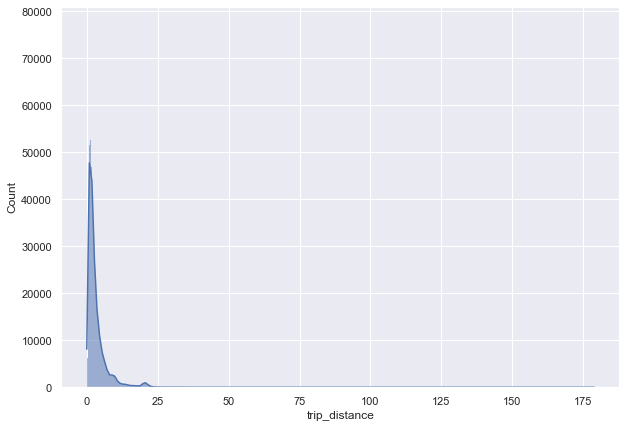

In [45]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.histplot(data = df, x = "trip_distance", kde=True)

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

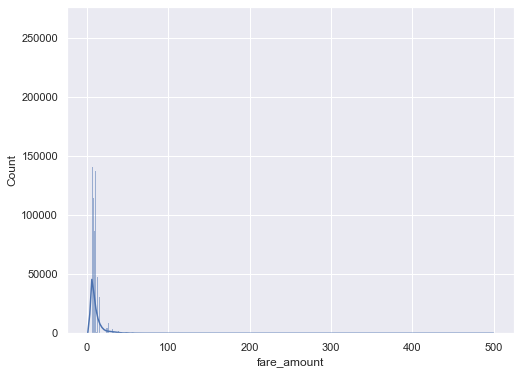

In [52]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.histplot(data = df, x = "fare_amount", kde=True)

<AxesSubplot:xlabel='trip_distance'>

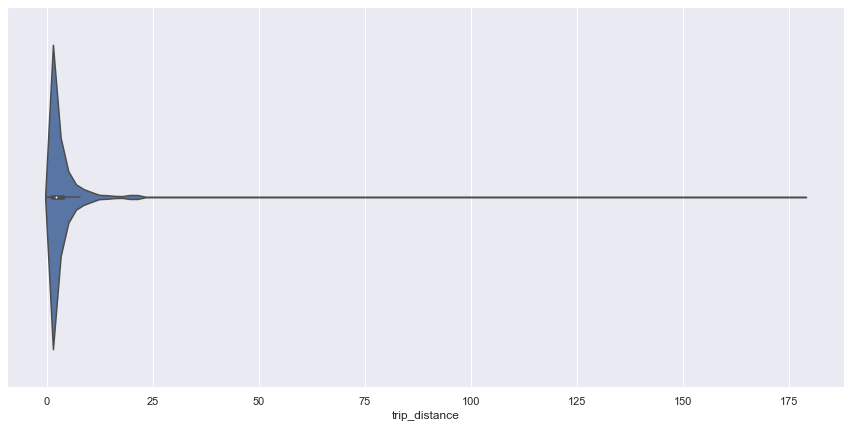

In [92]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.violinplot(data = df, x = df["trip_distance"])

<AxesSubplot:xlabel='trip_distance'>

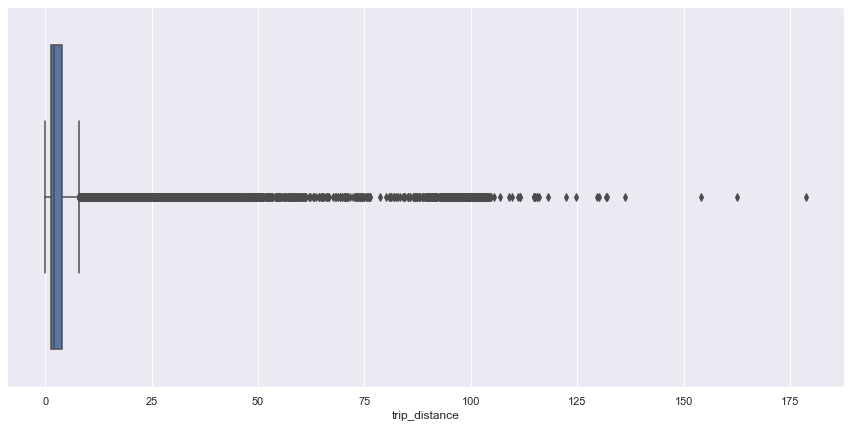

In [105]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.boxplot(data = df, x = df["trip_distance"])

<AxesSubplot:xlabel='fare_amount'>

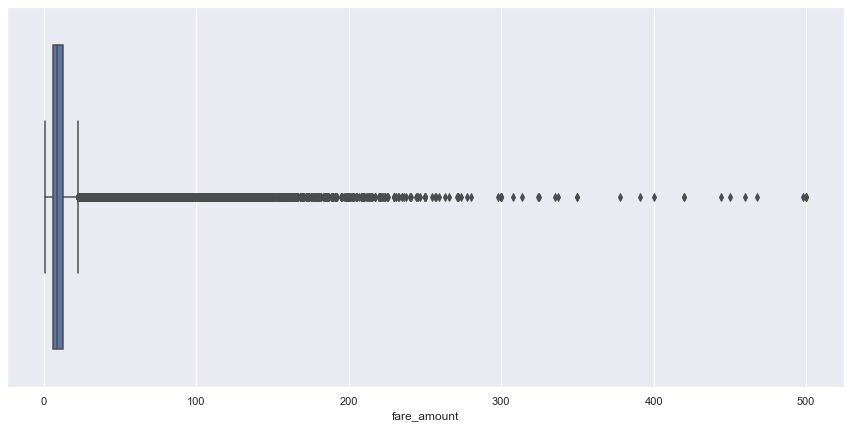

In [113]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.boxplot(data = df, x = df["fare_amount"])

<AxesSubplot:xlabel='fare_amount'>

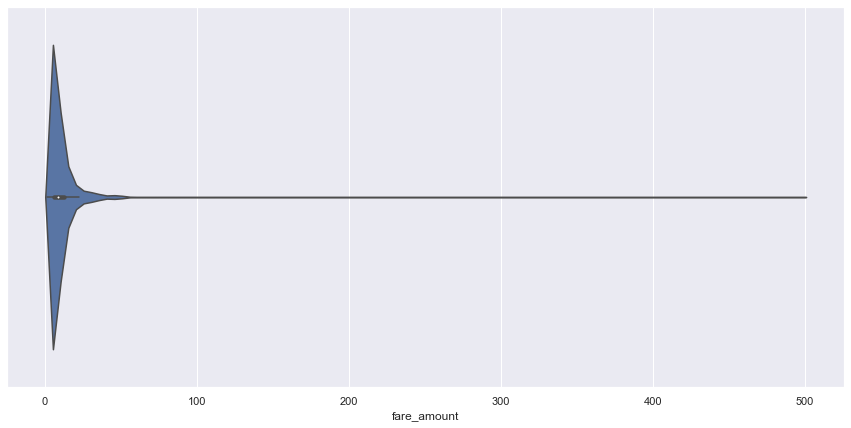

In [114]:
sns.set(rc={"figure.figsize":(15, 7)})
sns.violinplot(data = df, x = df["fare_amount"])

In [47]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=10)

In [48]:
len(train_df), len(val_df)

(4325283, 1081321)

In [49]:
train_df.isna().sum(), val_df.isna().sum()

(fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 trip_distance        0
 dtype: int64,
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 trip_distance        0
 dtype: int64)

In [50]:
train_df, val_df = train_df.dropna(), val_df.dropna()

In [51]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
2443022,20.00000,2014-01-10 11:54:15+00:00,-73.99590,40.75899,-73.97825,40.76028,2,1.49379
1967835,8.50000,2014-05-17 00:22:11+00:00,-73.97217,40.75353,-73.98581,40.75047,1,1.19842
80325,7.30000,2009-03-23 22:47:00+00:00,-73.98816,40.73797,-73.98424,40.75855,5,2.31202
2687585,8.00000,2015-04-23 17:24:22+00:00,-73.97698,40.75666,-73.96687,40.76978,2,1.68901
4203001,5.00000,2013-03-17 00:42:26+00:00,-73.99199,40.75303,-73.99031,40.76123,3,0.92275
...,...,...,...,...,...,...,...,...
2026187,7.50000,2013-11-21 22:42:00+00:00,-73.97788,40.74628,-73.96731,40.76042,1,1.80623
3333307,6.50000,2009-09-06 11:39:00+00:00,-73.98038,40.72622,-73.98960,40.73830,1,1.55157
3679920,4.10000,2010-04-10 10:58:00+00:00,-73.95399,40.78000,-73.96011,40.77533,1,0.73152
1978423,12.50000,2013-12-13 21:04:00+00:00,-73.97099,40.76105,-73.99104,40.76522,1,1.75143


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

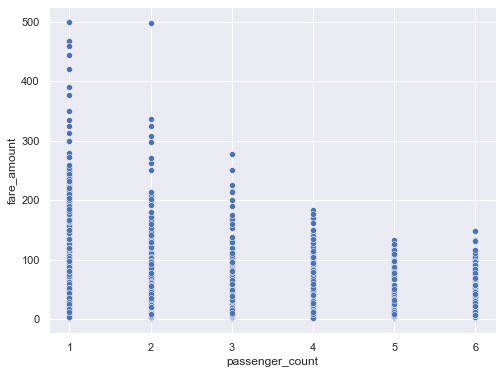

In [53]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.scatterplot(y = train_df["fare_amount"], x = train_df["passenger_count"])

In [55]:
test_df

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
0,2015-01-27 13:08:24+00:00,-73.97332,40.76381,-73.98143,40.74384,1,2.32326
1,2015-01-27 13:08:24+00:00,-73.98686,40.71938,-73.99889,40.73920,1,2.42535
2,2011-10-08 11:53:44+00:00,-73.98252,40.75126,-73.97965,40.74614,1,0.61863
3,2012-12-01 21:12:12+00:00,-73.98116,40.76781,-73.99045,40.75164,1,1.96103
4,2012-12-01 21:12:12+00:00,-73.96605,40.78977,-73.98856,40.74443,1,5.38730
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51+00:00,-73.96812,40.79700,-73.95564,40.78039,6,2.12487
9910,2015-01-12 17:05:51+00:00,-73.94551,40.80360,-73.96021,40.77637,6,3.27097
9911,2015-04-19 20:44:15+00:00,-73.99160,40.72661,-73.78974,40.64701,6,19.18394
9912,2015-01-31 01:05:19+00:00,-73.98557,40.73543,-73.93918,40.80173,6,8.34349


In [56]:
x = train_df.iloc[:, 6:]
x

,passenger_count,trip_distance
2443022,2,1.49379
1967835,1,1.19842
80325,5,2.31202
2687585,2,1.68901
4203001,3,0.92275
...,...,...
2026187,1,1.80623
3333307,1,1.55157
3679920,1,0.73152
1978423,1,1.75143


In [57]:
x_col = list(x.columns)
y_col = "fare_amount"

In [199]:
x_train = train_df[x_col]
x_train

,passenger_count,trip_distance
2443022,2,1.49379
1967835,1,1.19842
80325,5,2.31202
2687585,2,1.68901
4203001,3,0.92275
...,...,...
2026187,1,1.80623
3333307,1,1.55157
3679920,1,0.73152
1978423,1,1.75143


In [206]:
y_train = train_df[y_col]
y_train

2443022   20.00000
1967835    8.50000
80325      7.30000
2687585    8.00000
4203001    5.00000
            ...   
2026187    7.50000
3333307    6.50000
3679920    4.10000
1978423   12.50000
5374624   20.10000
Name: fare_amount, Length: 4324674, dtype: float64

### Validation Data

In [202]:
x_val = val_df[x_col]
x_val

,passenger_count,trip_distance
3204988,1,1.09542
2942682,1,1.86773
1766320,5,6.95483
566945,1,3.12795
2901381,1,3.02894
...,...,...
3253504,1,1.46237
380951,1,1.04631
3948780,1,2.02615
894909,1,3.08390


In [203]:
y_val = val_df[y_col]
y_val

3204988    6.90000
2942682   13.50000
1766320   13.70000
566945    12.50000
2901381   11.50000
            ...   
3253504    6.50000
380951     6.50000
3948780    5.30000
894909     7.70000
4452009    4.50000
Name: fare_amount, Length: 1081321, dtype: float64

Test Data

In [217]:
x_test = test_df[x_col]
x_test

,passenger_count,trip_distance
0,1,2.32326
1,1,2.42535
2,1,0.61863
3,1,1.96103
4,1,5.38730
...,...,...
9909,6,2.12487
9910,6,3.27097
9911,6,19.18394
9912,6,8.34349


In [107]:
x_train[x_col] = x_train[x_col].astype(float)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324988 entries, 3026156 to 5374844
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   trip_distance    float64
dtypes: float64(2)
memory usage: 99.0 MB


C:\Users\saqui\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Modelling 

Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

In [65]:
y_lr_train = model_lr.predict(x_train)
y_lr_train

array([ 9.50078451,  9.11848013, 10.57894341, ...,  8.64570919,
        9.67845174, 17.24016817])

In [66]:
y_lr_val = model_lr.predict(x_val)
y_lr_val

array([ 9.0141839 ,  9.79621066, 15.28014667, ...,  9.95661959,
       11.02767923,  8.69142273])

In [71]:
train_rmse = mean_squared_error(y_val, y_lr_val, squared=False) # returns rmse value when set to false
train_rmse

6.912301257047619

In [69]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y_val, y_lr_val)
val_mae

4.013061663622879

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [73]:
y_pred_dt = dt_regressor.predict(x_val)
y_pred_dt


array([ 4.1       ,  6.9       , 16.5       , ...,  8.5       ,
        7.7       ,  6.93333333])

In [74]:
dt_rmse = mean_squared_error(y_val, y_pred_dt, squared=False) # returns rmse value when set to false
dt_rmse

6.443435786505898

In [75]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance
count,4325283.00000,4325283.00000,4325283.00000,4325283.00000,4325283.00000,4325283.00000,4325283.00000
mean,11.33745,-73.97516,40.75105,-73.97432,40.75141,1.69137,3.33301
std,9.69796,0.03909,0.03005,0.03834,0.03326,1.30793,3.78751
min,1.00000,-74.98856,40.00000,-74.98084,40.00392,1.00000,0.00000
25%,6.00000,-73.99229,40.73657,-73.99159,40.73556,1.00000,1.25426
50%,8.50000,-73.98210,40.75339,-73.98061,40.75386,1.00000,2.15421
75%,12.50000,-73.96832,40.76754,-73.96536,40.76840,2.00000,3.91511
max,500.00000,-72.00593,41.96984,-72.08745,41.96973,6.00000,178.81596


Feature Engineering

In [77]:
def date_time_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day
    df[col + "_weekday"] = df[col].dt.weekday
    df[col + "_time"] = df[col].dt.time 

    return date_time_extract

In [78]:
date_time_extract(train_df, "pickup_datetime")
date_time_extract(val_df, "pickup_datetime")
date_time_extract(test_df, "pickup_datetime")

<function __main__.date_time_extract(df, col)>

In [79]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
2443022,20.00000,2014-01-10 11:54:15+00:00,-73.99590,40.75899,-73.97825,40.76028,2,1.49379,2014,1,10,4,11:54:15
1967835,8.50000,2014-05-17 00:22:11+00:00,-73.97217,40.75353,-73.98581,40.75047,1,1.19842,2014,5,17,5,00:22:11
80325,7.30000,2009-03-23 22:47:00+00:00,-73.98816,40.73797,-73.98424,40.75855,5,2.31202,2009,3,23,0,22:47:00
2687585,8.00000,2015-04-23 17:24:22+00:00,-73.97698,40.75666,-73.96687,40.76978,2,1.68901,2015,4,23,3,17:24:22
4203001,5.00000,2013-03-17 00:42:26+00:00,-73.99199,40.75303,-73.99031,40.76123,3,0.92275,2013,3,17,6,00:42:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026187,7.50000,2013-11-21 22:42:00+00:00,-73.97788,40.74628,-73.96731,40.76042,1,1.80623,2013,11,21,3,22:42:00
3333307,6.50000,2009-09-06 11:39:00+00:00,-73.98038,40.72622,-73.98960,40.73830,1,1.55157,2009,9,6,6,11:39:00
3679920,4.10000,2010-04-10 10:58:00+00:00,-73.95399,40.78000,-73.96011,40.77533,1,0.73152,2010,4,10,5,10:58:00
1978423,12.50000,2013-12-13 21:04:00+00:00,-73.97099,40.76105,-73.99104,40.76522,1,1.75143,2013,12,13,4,21:04:00


In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325283 entries, 2443022 to 5374624
Data columns (total 13 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   fare_amount              float64            
 1   pickup_datetime          datetime64[ns, UTC]
 2   pickup_longitude         float64            
 3   pickup_latitude          float64            
 4   dropoff_longitude        float64            
 5   dropoff_latitude         float64            
 6   passenger_count          int64              
 7   trip_distance            float64            
 8   pickup_datetime_year     int64              
 9   pickup_datetime_month    int64              
 10  pickup_datetime_day      int64              
 11  pickup_datetime_weekday  int64              
 12  pickup_datetime_time     object             
dtypes: datetime64[ns, UTC](1), float64(6), int64(5), object(1)
memory usage: 462.0+ MB


<AxesSubplot:xlabel='pickup_datetime_month', ylabel='count'>

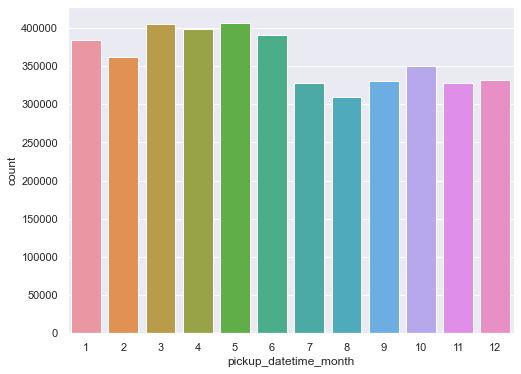

In [81]:
sns.countplot(data = train_df, x = "pickup_datetime_month")

<AxesSubplot:xlabel='pickup_datetime_month', ylabel='fare_amount'>

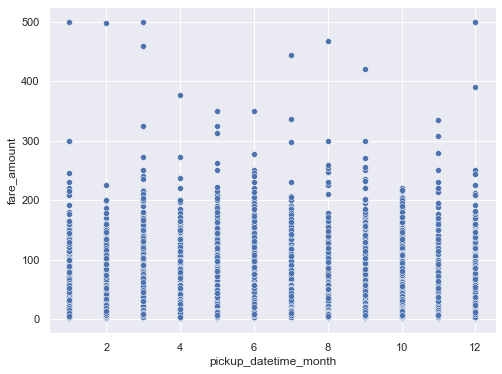

In [82]:
sns.scatterplot(data = train_df, x = "pickup_datetime_month", y = "fare_amount")

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

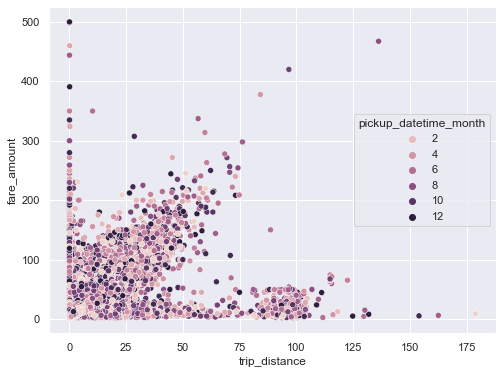

In [83]:
sns.scatterplot(data = train_df, x = "trip_distance", y = "fare_amount", hue = "pickup_datetime_month")

In [88]:
# some senario where distance traveled is larger with respect to price 
train_df.query("trip_distance >= 100 and fare_amount <= 10") 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
2047543,4.50000,2010-05-13 18:13:44+00:00,-73.13739,41.36614,-73.98737,40.72883,1,100.50976,2010,5,13,3,18:13:44
1423085,8.90000,2009-01-09 02:32:00+00:00,-72.00593,40.13750,-73.97560,40.71906,5,178.81596,2009,1,9,4,02:32:00
1647520,6.10000,2009-01-20 13:34:14+00:00,-73.13739,41.36614,-73.99367,40.74014,1,100.00207,2009,1,20,1,13:34:14
714461,8.50000,2009-06-17 07:37:30+00:00,-73.13739,41.36614,-74.01184,40.70769,3,103.63150,2009,6,17,2,07:37:30
4855621,6.10000,2010-07-03 02:22:34+00:00,-73.13739,41.36614,-73.98564,40.72187,1,100.95727,2010,7,3,5,02:22:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998385,8.50000,2010-07-29 08:45:18+00:00,-74.01125,40.71533,-73.13739,41.36614,1,102.99455,2010,7,29,3,08:45:18
4723599,8.50000,2010-05-26 19:19:04+00:00,-73.98493,40.72422,-73.13739,41.36614,1,100.72910,2010,5,26,2,19:19:04
2526389,9.30000,2009-08-25 23:53:16+00:00,-73.98879,40.72708,-73.13739,41.36614,3,100.73278,2009,8,25,1,23:53:16
2203370,6.10000,2009-12-15 08:27:10+00:00,-73.13739,41.36614,-73.99653,40.72580,1,101.29415,2009,12,15,1,08:27:10


In [90]:
train_df.query("trip_distance <= 10 and fare_amount >= 100") 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
481399,100.00000,2009-12-13 18:41:00+00:00,-73.80794,41.03726,-73.80794,41.03726,1,0.00000,2009,12,13,6,18:41:00
5232458,191.33000,2014-07-14 15:48:00+00:00,-74.44907,40.83642,-74.44903,40.83634,1,0.00988,2014,7,14,0,15:48:00
5025211,120.00000,2011-04-28 14:41:00+00:00,-74.03560,40.74089,-74.03564,40.74092,1,0.00526,2011,4,28,3,14:41:00
3149578,100.00000,2012-06-22 13:54:28+00:00,-73.99091,40.75076,-73.99135,40.75045,2,0.05149,2012,6,22,4,13:54:28
3299310,250.00000,2013-12-20 00:43:14+00:00,-73.99637,40.40796,-73.99636,40.40795,2,0.00204,2013,12,20,4,00:43:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195027,145.00000,2009-01-14 17:34:00+00:00,-74.24128,40.82366,-74.24128,40.82366,1,0.00028,2009,1,14,2,17:34:00
3520630,166.66000,2015-03-14 19:25:38+00:00,-73.70417,41.06908,-73.70417,41.06909,1,0.00127,2015,3,14,5,19:25:38
5343609,220.00000,2014-11-05 21:55:00+00:00,-73.98744,40.77539,-73.98745,40.77538,1,0.00119,2014,11,5,2,21:55:00
4539699,119.00000,2013-12-06 19:44:02+00:00,-74.17744,40.69085,-74.17741,40.69083,1,0.00253,2013,12,6,4,19:44:02


In [93]:
# removing data where trip price is very high compared to distance traveled 
train_df = train_df.drop(train_df[(train_df.trip_distance <= 10) & (train_df.fare_amount >= 100)].index)
train_df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
2443022,20.00000,2014-01-10 11:54:15+00:00,-73.99590,40.75899,-73.97825,40.76028,2,1.49379,2014,1,10,4,11:54:15
1967835,8.50000,2014-05-17 00:22:11+00:00,-73.97217,40.75353,-73.98581,40.75047,1,1.19842,2014,5,17,5,00:22:11
80325,7.30000,2009-03-23 22:47:00+00:00,-73.98816,40.73797,-73.98424,40.75855,5,2.31202,2009,3,23,0,22:47:00
2687585,8.00000,2015-04-23 17:24:22+00:00,-73.97698,40.75666,-73.96687,40.76978,2,1.68901,2015,4,23,3,17:24:22
4203001,5.00000,2013-03-17 00:42:26+00:00,-73.99199,40.75303,-73.99031,40.76123,3,0.92275,2013,3,17,6,00:42:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026187,7.50000,2013-11-21 22:42:00+00:00,-73.97788,40.74628,-73.96731,40.76042,1,1.80623,2013,11,21,3,22:42:00
3333307,6.50000,2009-09-06 11:39:00+00:00,-73.98038,40.72622,-73.98960,40.73830,1,1.55157,2009,9,6,6,11:39:00
3679920,4.10000,2010-04-10 10:58:00+00:00,-73.95399,40.78000,-73.96011,40.77533,1,0.73152,2010,4,10,5,10:58:00
1978423,12.50000,2013-12-13 21:04:00+00:00,-73.97099,40.76105,-73.99104,40.76522,1,1.75143,2013,12,13,4,21:04:00


In [96]:
train_df.columns[2:6]

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [97]:
train_df = train_df.drop(columns=['pickup_longitude', 'pickup_latitude', 
'dropoff_longitude', 'dropoff_latitude'])

train_df

,fare_amount,pickup_datetime,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
2443022,20.00000,2014-01-10 11:54:15+00:00,2,1.49379,2014,1,10,4,11:54:15
1967835,8.50000,2014-05-17 00:22:11+00:00,1,1.19842,2014,5,17,5,00:22:11
80325,7.30000,2009-03-23 22:47:00+00:00,5,2.31202,2009,3,23,0,22:47:00
2687585,8.00000,2015-04-23 17:24:22+00:00,2,1.68901,2015,4,23,3,17:24:22
4203001,5.00000,2013-03-17 00:42:26+00:00,3,0.92275,2013,3,17,6,00:42:26
...,...,...,...,...,...,...,...,...,...
2026187,7.50000,2013-11-21 22:42:00+00:00,1,1.80623,2013,11,21,3,22:42:00
3333307,6.50000,2009-09-06 11:39:00+00:00,1,1.55157,2009,9,6,6,11:39:00
3679920,4.10000,2010-04-10 10:58:00+00:00,1,0.73152,2010,4,10,5,10:58:00
1978423,12.50000,2013-12-13 21:04:00+00:00,1,1.75143,2013,12,13,4,21:04:00


In [111]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'passenger_count', 'trip_distance',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_time'],
      dtype='object')

In [103]:
train_df[['fare_amount', 'passenger_count', 'trip_distance']].describe()

,fare_amount,passenger_count,trip_distance
count,4324674.00000,4324674.00000,4324674.00000
mean,11.31934,1.69143,3.33341
std,9.55617,1.30799,3.78759
min,1.00000,1.00000,0.00000
25%,6.00000,1.00000,1.25455
50%,8.50000,1.00000,2.15448
75%,12.50000,2.00000,3.91545
max,467.50000,6.00000,178.81596


Text(0.5, 1.0, 'Violin Plot')

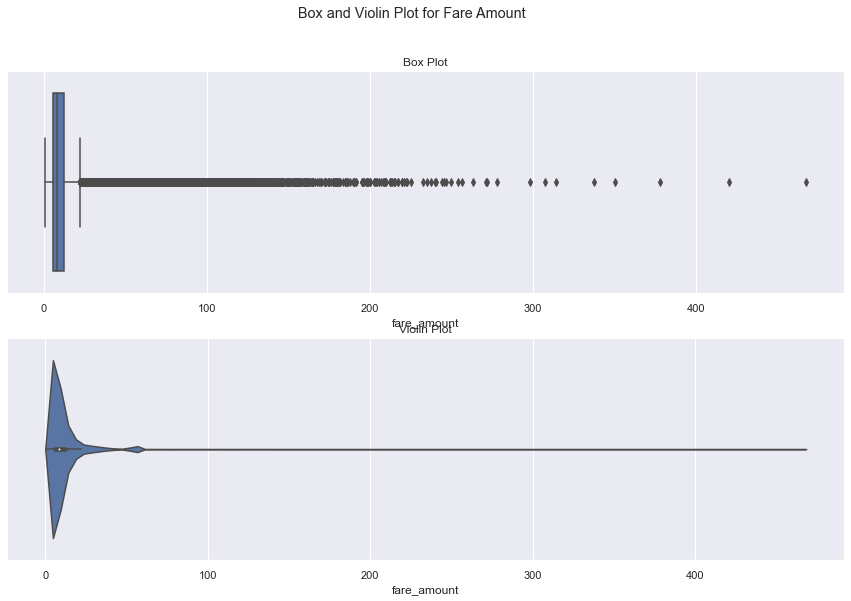

In [123]:
fig, axes = plt.subplots(2, 1, figsize = (15, 9), sharey = True)
fig.suptitle("Box and Violin Plot for Fare Amount")

sns.boxplot(ax = axes[0], data = train_df, x = train_df["fare_amount"])
axes[0].set_title("Box Plot")

#
sns.violinplot(ax = axes[1], data = train_df, x = train_df["fare_amount"])
axes[1].set_title("Violin Plot")

Text(0.5, 1.0, 'Violin Plot')

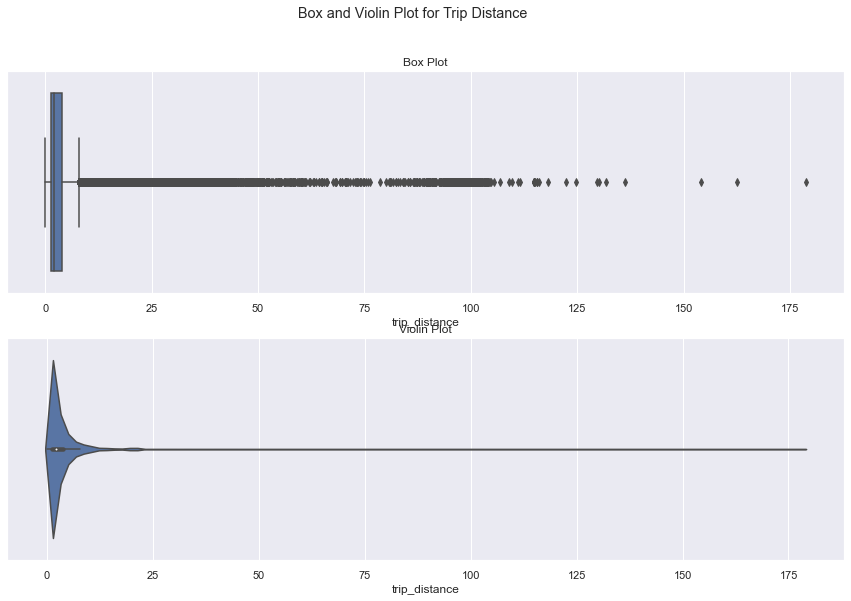

In [124]:
fig, axes = plt.subplots(2, 1, figsize = (15, 9), sharey = True)
fig.suptitle("Box and Violin Plot for Trip Distance")

sns.boxplot(ax = axes[0], data = train_df, x = train_df["trip_distance"])
axes[0].set_title("Box Plot")

#
sns.violinplot(ax = axes[1], data = train_df, x = train_df["trip_distance"])
axes[1].set_title("Violin Plot")

The dataset is positively Skewed, have to drop outliers 

Text(0.5, 1.0, 'Violin Plot')

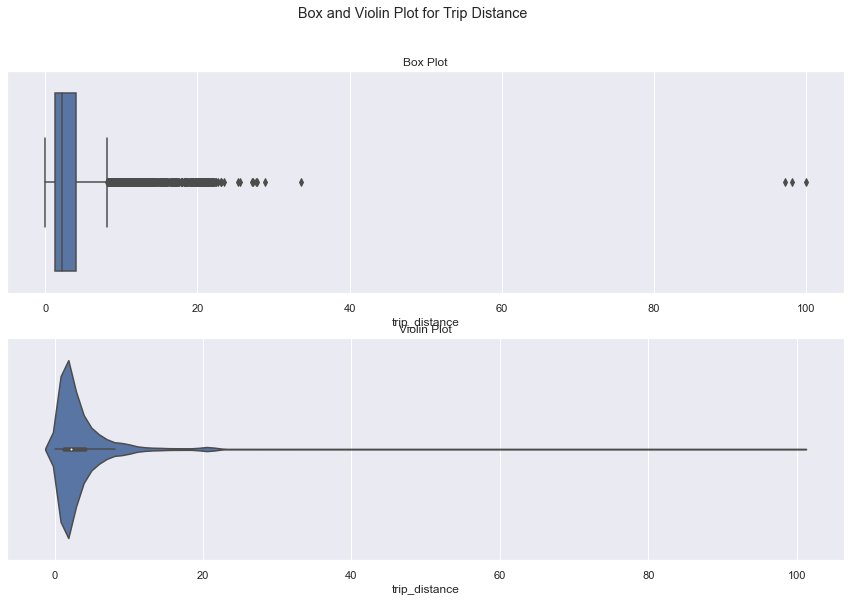

In [125]:
fig, axes = plt.subplots(2, 1, figsize = (15, 9), sharey = True)
fig.suptitle("Box and Violin Plot for Trip Distance")

sns.boxplot(ax = axes[0], data = test_df, x = test_df["trip_distance"])
axes[0].set_title("Box Plot")

#
sns.violinplot(ax = axes[1], data = test_df, x = test_df["trip_distance"])
axes[1].set_title("Violin Plot")

In [ ]:
train_df = train_df.drop(train_df[(train_df.trip_distance <= 10) & (train_df.fare_amount >= 100)].index)
train_df

In [126]:
train_df

,fare_amount,pickup_datetime,passenger_count,trip_distance,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_time
2443022,20.00000,2014-01-10 11:54:15+00:00,2,1.49379,2014,1,10,4,11:54:15
1967835,8.50000,2014-05-17 00:22:11+00:00,1,1.19842,2014,5,17,5,00:22:11
80325,7.30000,2009-03-23 22:47:00+00:00,5,2.31202,2009,3,23,0,22:47:00
2687585,8.00000,2015-04-23 17:24:22+00:00,2,1.68901,2015,4,23,3,17:24:22
4203001,5.00000,2013-03-17 00:42:26+00:00,3,0.92275,2013,3,17,6,00:42:26
...,...,...,...,...,...,...,...,...,...
2026187,7.50000,2013-11-21 22:42:00+00:00,1,1.80623,2013,11,21,3,22:42:00
3333307,6.50000,2009-09-06 11:39:00+00:00,1,1.55157,2009,9,6,6,11:39:00
3679920,4.10000,2010-04-10 10:58:00+00:00,1,0.73152,2010,4,10,5,10:58:00
1978423,12.50000,2013-12-13 21:04:00+00:00,1,1.75143,2013,12,13,4,21:04:00


In [127]:
x_train = train_df.iloc[:, 2:4]
x_train

,passenger_count,trip_distance
2443022,2,1.49379
1967835,1,1.19842
80325,5,2.31202
2687585,2,1.68901
4203001,3,0.92275
...,...,...
2026187,1,1.80623
3333307,1,1.55157
3679920,1,0.73152
1978423,1,1.75143


In [169]:
y_train = train_df.iloc[:, 0:1]
y_train

,fare_amount
2443022,20.00000
1967835,8.50000
80325,7.30000
2687585,8.00000
4203001,5.00000
...,...
2026187,7.50000
3333307,6.50000
3679920,4.10000
1978423,12.50000


In [155]:
from sklearn.preprocessing import normalize
x_arr = np.array(x_train[["passenger_count", "trip_distance"]])
train_df_norm = normalize(x_arr, axis = 0)
train_df_norm

array([[4.49791405e-04, 1.42365966e-04],
       [2.24895703e-04, 1.14215146e-04],
       [1.12447851e-03, 2.20347186e-04],
       ...,
       [2.24895703e-04, 6.97173189e-05],
       [2.24895703e-04, 1.66920417e-04],
       [4.49791405e-04, 8.70807017e-04]])

In [158]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_df_norm = trans.fit_transform(x_train)
train_df_norm

array([[0.2       , 0.0083538 ],
       [0.        , 0.00670196],
       [0.8       , 0.01292961],
       ...,
       [0.        , 0.0040909 ],
       [0.        , 0.00979461],
       [0.2       , 0.05109752]])

In [159]:
train_df_norm = pd.DataFrame(train_df_norm, columns=x_train.columns)
train_df_norm

,passenger_count,trip_distance
0,0.20000,0.00835
1,0.00000,0.00670
2,0.80000,0.01293
3,0.20000,0.00945
4,0.40000,0.00516
...,...,...
4324669,0.00000,0.01010
4324670,0.00000,0.00868
4324671,0.00000,0.00409
4324672,0.00000,0.00979


Text(0.5, 1.0, 'Violin Plot')

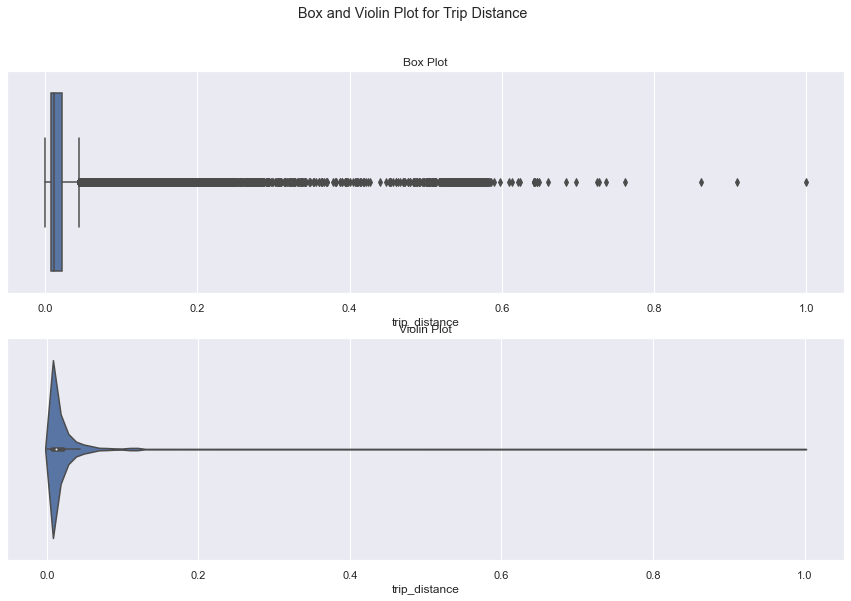

In [162]:
fig, axes = plt.subplots(2, 1, figsize = (15, 9), sharey = True)
fig.suptitle("Box and Violin Plot for Trip Distance")

sns.boxplot(ax = axes[0], data = train_df_norm, x = train_df_norm["trip_distance"])
axes[0].set_title("Box Plot")

#
sns.violinplot(ax = axes[1], data = train_df_norm, x = train_df_norm["trip_distance"])
axes[1].set_title("Violin Plot")

In [161]:
print(f"The standard deviation for trip distance is {np.std(train_df['trip_distance'])}")
print(f"The mean for trip distance is {np.mean(train_df['trip_distance'])}")

The standard deviation for trip distance is 3.787586086891922
The mean for trip distance is 3.333413534021316


In [85]:
train_df["pickup_datetime_month"].value_counts()

5     406882
3     405238
4     398468
6     390480
1     384112
2     362443
10    349877
12    332035
9     329821
11    328365
7     328219
8     309343
Name: pickup_datetime_month, dtype: int64

## ML Using Standardizing Data

In [170]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)
model2.fit(train_df_norm, y_train)

C:\Users\saqui\AppData\Local\Temp/ipykernel_17164/487815873.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(train_df_norm, y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [180]:
x_val = trans.transform(x_val)
x_val

array([[0.        , 0.00612594],
       [0.        , 0.01044498],
       [0.8       , 0.03889381],
       ...,
       [0.        , 0.0113309 ],
       [0.        , 0.01724624],
       [0.        , 0.00434337]])

In [181]:
y_pred_rfr = model2.predict(x_val)
y_pred_rfr

array([ 5.98918083,  7.83489141, 18.88381268, ...,  8.14320006,
       10.51765894,  5.17245031])

In [182]:
train_rmse = mean_squared_error(y_val, y_pred_rfr, squared=False) # returns rmse value when set to false
train_rmse

4.744529989522379

### Using Standard Scalar

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_train

array([[ 0.23591104, -0.48569741],
       [-0.52862284, -0.56368271],
       [ 2.52951269, -0.2696686 ],
       ...,
       [-0.52862284, -0.68695358],
       [-0.52862284, -0.41767502],
       [ 0.23591104,  1.53227894]])

In [204]:
x_val = sc.transform(x_val)
x_val

array([[-0.52862284, -0.59087703],
       [-0.52862284, -0.38697042],
       [ 2.52951269,  0.95612889],
       ...,
       [-0.52862284, -0.3451452 ],
       [-0.52862284, -0.0658758 ],
       [-0.52862284, -0.67503417]])

In [218]:
x_test_std = sc.transform(x_test)
x_test_std

array([[-0.52862284, -0.26670123],
       [-0.52862284, -0.23974651],
       [-0.52862284, -0.7167588 ],
       ...,
       [ 3.29404658,  4.18486272],
       [ 3.29404658,  1.32276144],
       [ 3.29404658, -0.56832722]])

In [208]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)
model2.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [209]:
y_pred_rfr = model2.predict(x_val)
y_pred_rfr

array([ 5.9317956 ,  7.86193395, 18.87472936, ...,  8.20832908,
       10.52299333,  5.17569936])

In [210]:
train_rmse = mean_squared_error(y_val, y_pred_rfr, squared=False) # returns rmse value when set to false
train_rmse

4.744910646883368

In [221]:
def predict_and_submit(model, fname):
    test_preds = model2.predict(x_test_std)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [222]:
predict_and_submit(model2, "random_forest_regressor.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.88881
1,2015-01-27 13:08:24.0000003,9.09107
2,2011-10-08 11:53:44.0000002,4.83900
3,2012-12-01 21:12:12.0000002,8.06268
4,2012-12-01 21:12:12.0000003,15.26954
...,...,...
9909,2015-05-10 12:37:51.0000002,8.87526
9910,2015-01-12 17:05:51.0000001,11.68046
9911,2015-04-19 20:44:15.0000001,53.28256
9912,2015-01-31 01:05:19.0000005,24.57936


In [223]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')
model3.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [224]:
y_pred_xgboost = model3.predict(x_val)
y_pred_xgboost

array([ 5.8816586,  7.8433557, 19.232252 , ...,  8.252867 , 10.50307  ,
        5.1234612], dtype=float32)

In [225]:
val_rmse = mean_squared_error(y_val, y_pred_xgboost, squared=False) # returns rmse value when set to false
val_rmse

4.974175080403975

In [226]:
predict_and_submit(model3, "xgboost_regressor.csv")

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.88881
1,2015-01-27 13:08:24.0000003,9.09107
2,2011-10-08 11:53:44.0000002,4.83900
3,2012-12-01 21:12:12.0000002,8.06268
4,2012-12-01 21:12:12.0000003,15.26954
...,...,...
9909,2015-05-10 12:37:51.0000002,8.87526
9910,2015-01-12 17:05:51.0000001,11.68046
9911,2015-04-19 20:44:15.0000001,53.28256
9912,2015-01-31 01:05:19.0000005,24.57936


In [227]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(x_train, y_train)
    train_rmse = mean_squared_error(model.predict(x_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), y_val, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [228]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

Wall time: 14min 31s


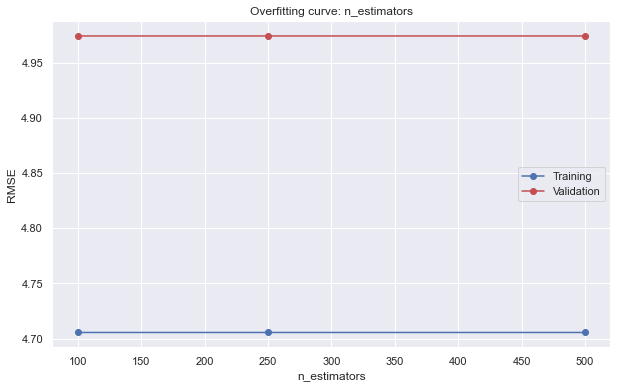

In [229]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [230]:
best_params['n_estimators'] = 100

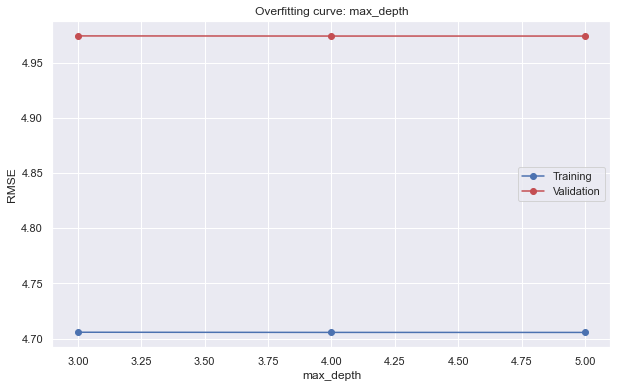

In [231]:
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Wall time: 7min 6s


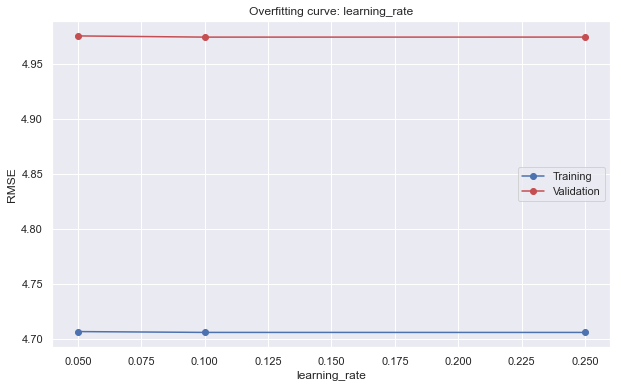

In [232]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)